# 당뇨병 데이터 확인 및 전처리

In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [43]:
data = pd.read_csv("diabetes.csv")

### 데이터 설명
- Pregnancies (임신 횟수): 임신한 횟수 (정수형)
- Glucose (포도당 수치): 경구 포도당 내성 검사(OGTT)에서 측정한 혈당 수치 (mg/dL)
- BloodPressure (혈압): 이완기 혈압(mm Hg)
- SkinThickness (피부 두께): 삼두근 피하지방 두께(mm)
- Insulin (인슐린 수치): 혈중 인슐린 농도(μU/mL)
- BMI (체질량지수): 체중(kg) / 키(m)²로 계산한 체질량지수
- DiabetesPedigreeFunction (당뇨 내력 함수): 유전적 요소를 반영한 수치 (값이 높을수록 가족력 영향이 큼)
- Outcome (당뇨병 여부):
- 0: 당뇨병 없음
- 1: 당뇨병 있음

In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- 결측치가 없음

In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 데이터 값이 0이면 안되는 열들이 존재하는 것으로 보임

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Count'>

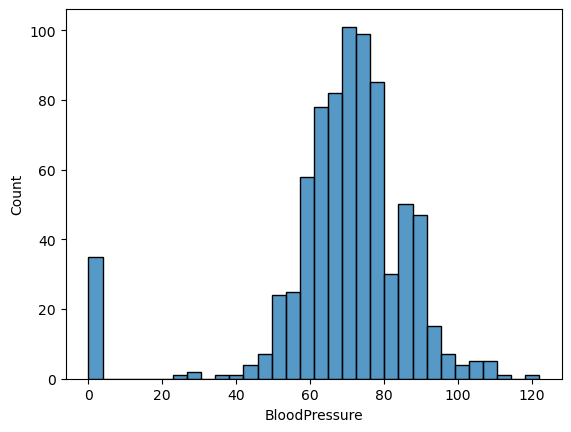

In [48]:
sns.histplot(x= "BloodPressure",data=data)

In [49]:
Bloodcount = (data["Glucose"] == 0).sum()

print(f"BloodPressure가 0인 개수: {Bloodcount}개")

BloodPressure가 0인 개수: 5개


c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glucose', ylabel='Count'>

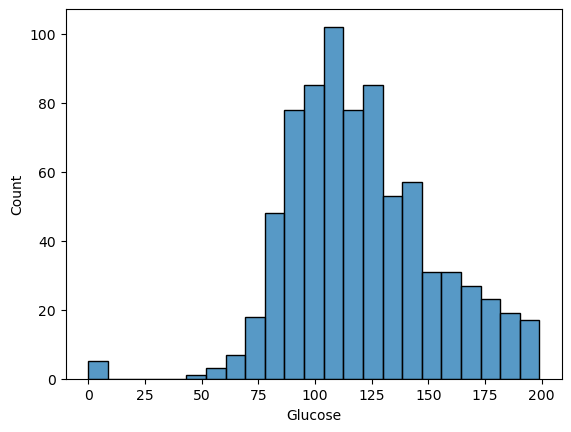

In [50]:
sns.histplot(x= "Glucose",data=data)

In [51]:
Glucosecount = (data["Glucose"] == 0).sum()

print(f"Glucose가 0인 개수: {Glucosecount}개")

Glucose가 0인 개수: 5개


c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SkinThickness', ylabel='Count'>

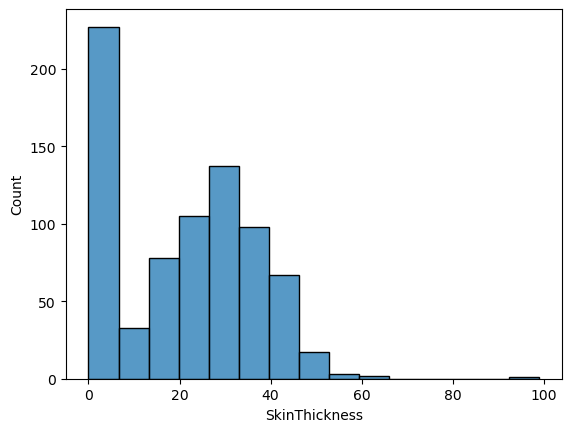

In [52]:
sns.histplot(x= "SkinThickness",data=data)

<Axes: ylabel='SkinThickness'>

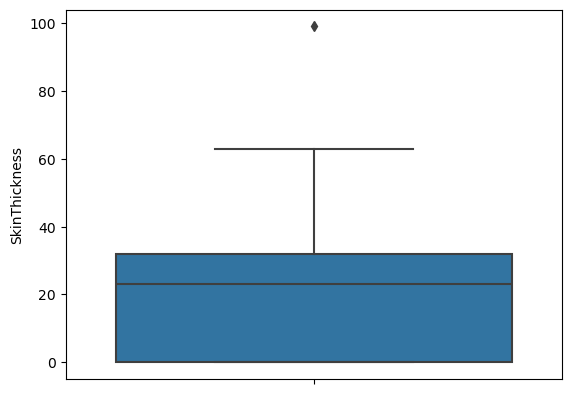

In [53]:
sns.boxplot(y= "SkinThickness",data=data)

In [54]:
Skincount = (data["SkinThickness"] == 0).sum()

print(f"SkinThickness가 0인 개수: {Skincount}개")

SkinThickness가 0인 개수: 227개


c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

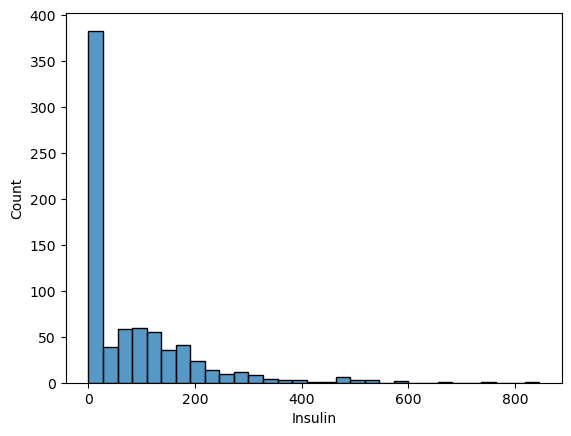

In [55]:
sns.histplot(x= "Insulin",data=data)

<Axes: ylabel='Insulin'>

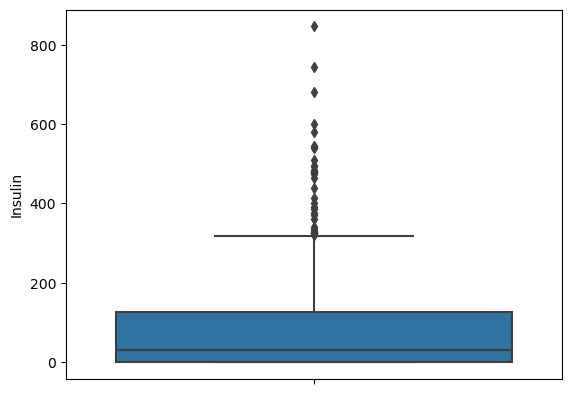

In [56]:
sns.boxplot(y= "Insulin",data=data)

In [57]:
Insulincount = (data["Insulin"] == 0).sum()

print(f"Insulin가 0인 개수: {Insulincount}개")

Insulin가 0인 개수: 374개


c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Count'>

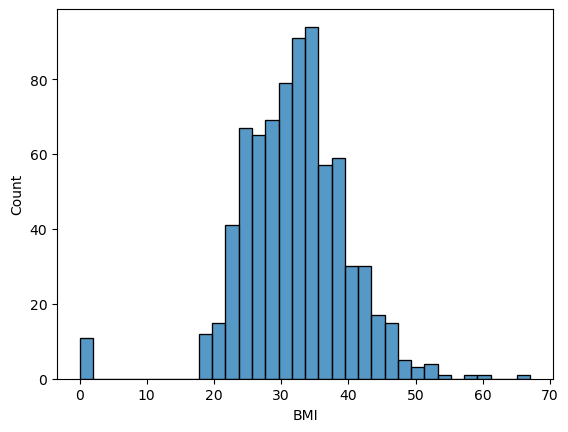

In [58]:
sns.histplot(x= "BMI",data=data)

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pregnancies', ylabel='Count'>

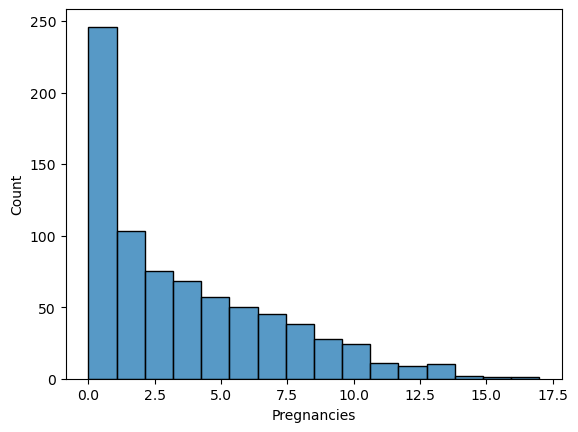

In [59]:
sns.histplot(x= "Pregnancies",data=data)

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

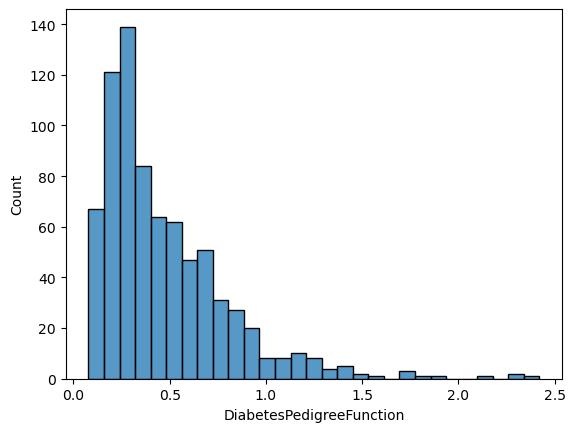

In [60]:
sns.histplot(x= "DiabetesPedigreeFunction",data=data)

c:\Users\chldu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

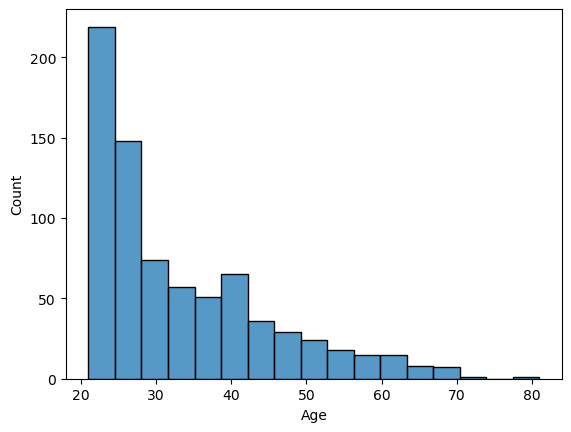

In [61]:
sns.histplot(x= "Age",data=data)

<Axes: xlabel='Outcome', ylabel='count'>

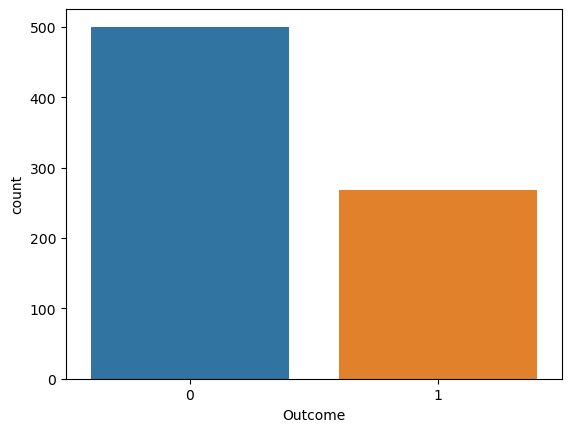

In [62]:
sns.countplot(x= "Outcome",data=data)

In [63]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- 인슐린과 피부 두께가 0의 개수가 많은데 결과와 크게 관련 없어서 값을 대체해도 큰 영향이 없다고 판단

In [64]:
df=data.copy()

Q1 = df["SkinThickness"].quantile(0.25)
Q3 = df["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["SkinThickness"] >= lower_bound) & (df["SkinThickness"] <= upper_bound)]

columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for i in columns:
    mean_value = df[df[i] != 0][i].mean()
    df[i] = df[i].replace(0, mean_value)

- 피부 두께 열에 이상치 하나를 제거 후 나머지 0 값에 평균값을 대체

In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.587927,72.408470,29.024074,155.548223,32.454497,0.471742,33.203390,0.348110
std,3.371117,30.333839,12.103927,8.426203,85.076586,6.879160,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.408470,29.024074,155.548223,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 랜덤 포레스트 모델링

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [67]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도: {accuracy:.4f}")

랜덤 포레스트 정확도: 0.7922
